<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW3_Classification_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 3. Линейная классификация. Работа с признаками**

### **Оценивание и штрафы**

Кака всегда - каждая из задач имеет «стоимость» (указана в скобках около задачи).

В задании три части:

- Часть 1 (2.5 балла): написание логистической регрессии своими руками
- Часть 2 (5 баллов): различные методы отбора признаков
- Часть 3 (3.5 балла): обучение моделей классификации на текстах

Всего за задание можно получить 11 баллов, но:

**Балл за задание = min{ваш балл, 10}.**

In [76]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# **Часть 1. Логистическая регрессия своими руками (2.5 балла)**

## **Задание 1. Реализуйте класс логистической регрессии, обучаемой с помощью:**

**Задание 1.1 (1 балл). Градиентного спуска**

**Задание 1.2 (1 балл). Стохастического градиентного спуска**

До этого вы писали код без ограничений. Здесь же необходимо соблюдать следующие условия:

- Градиентный спуск необходимо записать в векторном виде;
- Циклы средствами python допускается использовать только для итераций градиентного спуска;

**Класс градиентного спуска должен:**
- В качестве критерия останова использовать (одновременно):
  - проверку на евклидову норму разности весов на двух соседних итерациях задаваемого параметром `tolerance`;
  - достижение максимального числа итераций, задаваемого параметром `max_iter`.
- Обладать атрибутом `loss_history`. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту). Данный атрибут необходим, чтобы проследить, что оптимизационный процесс действительно сходится;
- Инициализировать веса случайным образом или нулевым вектором (на ваш выбор).

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

**Шаблон класса описан ниже, вам нужно реализовать каждую из заготовленных функций.**

**ВАЖНО!** Мы заполняем данный шаблон, даже если он нам не нравится. Менять структуру класса и писать по-своему запрещено - за это будут сняты баллы.

In [2]:
EPS = 1e-5

In [3]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        n_samples, n_features = X.shape
        self.w = self.w0 if self.w0 is not None else np.zeros(n_features)
        for iteration in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            w_prev = self.w.copy()

            self.w -= self.eta * gradient

            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)
            if np.linalg.norm(self.w - w_prev) < self.tolerance:
                break
        return self


    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return 1 / (1 + np.exp(-X.dot(self.w)))


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        m = X.shape[0]
        predictions = self.predict_proba(X)
        gradient = X.T.dot(predictions - y) / m
        return gradient

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        predictions = self.predict_proba(X)
        loss = -np.mean(y * np.log(predictions + EPS) + (1 - y) * np.log(1 - predictions + EPS))
        return loss

Теперь проверим работу вашего класса на синтетических данных.

In [2]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

## **Задание 2 (0.5 балла)**

Обучите логистическую регрессию на синтетических данных.

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = LogReg(gd_type='full', max_iter=1000, tolerance=1e-4, eta=0.01)
model.fit(X_train, y_train)

LogReg(gd_type='full')

In [10]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

y_probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs)
pr_auc = average_precision_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)

In [11]:
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR AUC: {pr_auc:.4f}")

ROC AUC: 0.9237
PR AUC: 0.9201


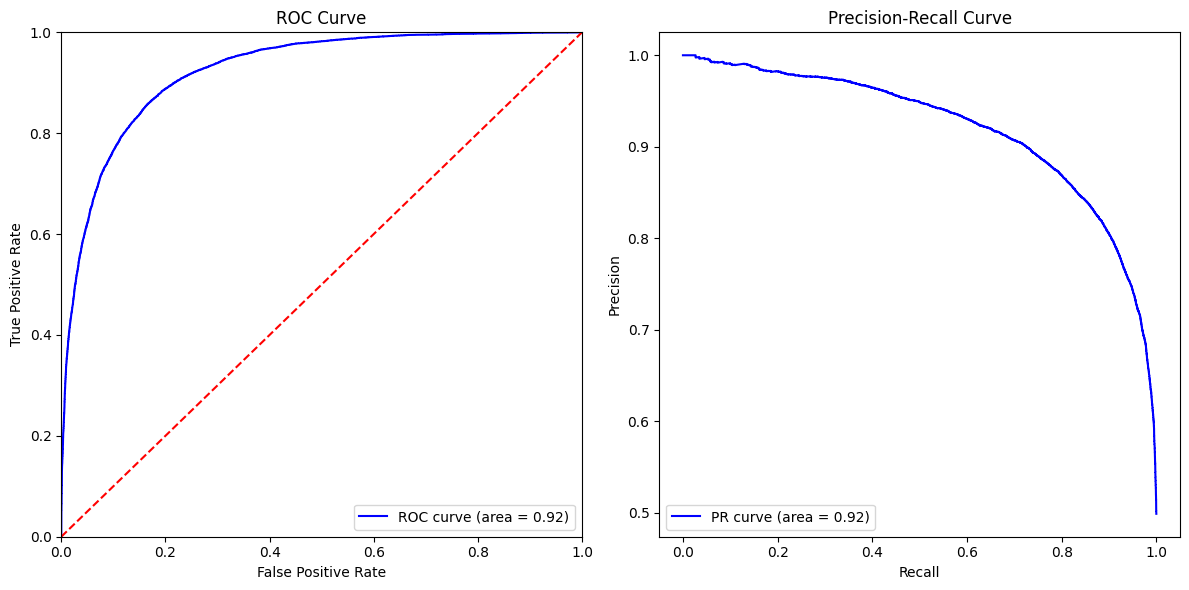

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()



# ROC AUC

Значение 0.5 указывает на случайное угадывание, а значение 1.0 на идеальную классификацию.
Значение 0.92 - значит классификация почти идеальная

# PR AUC

Значение. При нормальных значениях порог, например, 0.5 показывает хорошие результыаты.

# **Часть 2. Отбор признаков (5 баллов)**

Перейдём к еще одной важной части процесса работы с данными — отбору признаков. Он нужен в следующих случаях:
- Мы хотим сократить время вычислений;
- Мы хотим избежать переобучения;
- Мы хотим попытаться улучшить качество модели за счет уменьшения признакового пространства;

В этой части мы попробуем применить несколько подходов для отбора признаков и оценим, как они влияют на качество модели и сколько времени занимают.

**Данные** \

Будем использовать датасет [об обращениях клиентов по страховым случаям](https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data?select=train.csv). Скачайте его с Kaggle (файл `train.csv`).

Задача представляет собой бинарную классификациюю — воспользуется ли клиент страховкой на авто в ближайший год.

In [68]:
PATH_TO_DATASET = "./data/train.csv"

data = pd.read_csv(PATH_TO_DATASET, index_col=0)
target = data.target.values

data = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [3]:
data.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

### **Задание 3. (0.25 балла)**

Прежде всего — в данных много категориальных признаков.

- Закодируйте их с помощью one-hot кодирования. Категориальные признаки отмечены постфиксом `cat`;
- Исходные колонки с категориальными признаками удалите;
- Зафиксируйте, сколько признаков получилось;

In [69]:
cat_columns = [col for col in data.columns if col.endswith('_cat')]

df_encoded = pd.get_dummies(data, columns=cat_columns, drop_first=True)

num_features = df_encoded.shape[1]

print(f'Количество признаков после one-hot кодирования: {num_features}')

Количество признаков после one-hot кодирования: 213


### **Задание 4 (1 балл)**

Обучим несколько моделей, перечисленных ниже. В качестве метрики будем использовать ROC-AUC.

**Задание 4.1**

- Обучите модель логистической регрессии. Замерьте скорость обучения модели
- Обучите метод опорных векторов
- Обучите метод k ближайших соседей
- Посчитайте качество моделей (ROC-AUC) на тестовой выборке

**Задание 4.2**

Для каждой из трех моделей (логистическая регрессия, SVM, KNN) подберите при помощи GridSearchCV на тренировочных данных оптимальные гиперпараметры:
- Для логистической регрессии: C, class_weight
- Для SVM: C, kernel, class_weight
- Для KNN: n_neighbors, weights

Затем посчитайте качество моделей на тестовой выборке.

В заданиях 4.1 и 4.2 замеряйте время обучения моделей.


In [21]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {
    'C': [0.001,0.01,0.1,1,10],
    'class_weight': [None, 'balanced']
}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, scoring='roc_auc', cv=3)
start_time = time.time()
log_reg_grid.fit(X_train, y_train)
log_reg_grid_time = time.time() - start_time
log_reg_best_auc = log_reg_grid.best_score_
log_reg_best_params = log_reg_grid.best_params_

log_reg_best = log_reg_grid.best_estimator_
log_reg_best_preds = log_reg_best.predict_proba(X_test)[:, 1]
log_reg_test_auc = roc_auc_score(y_test, log_reg_best_preds)

/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [23]:
print(f'Логистическая регрессия: AUC на тренировочных данных = {log_reg_best_auc:.4f}, '
      f'Тестовое AUC = {log_reg_test_auc:.4f}, '
      f'Лучшие параметры = {log_reg_best_params}, '
      f'Время GridSearch = {log_reg_grid_time:.4f} сек')

Логистическая регрессия: AUC на тренировочных данных = 0.6195, Тестовое AUC = 0.6269, Лучшие параметры = {'C': 0.01, 'class_weight': 'balanced'}, Время GridSearch = 265.8174 сек


In [4]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

svm_params = {
    'C': [0.01,0.1],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}
svm_grid = GridSearchCV(SVC(probability=True, max_iter=100), svm_params, scoring='roc_auc', cv=2, verbose=3)
start_time = time.time()
svm_grid.fit(X_train, y_train)
svm_grid_time = time.time() - start_time
svm_best_auc = svm_grid.best_score_
svm_best_params = svm_grid.best_params_

Fitting 2 folds for each of 8 candidates, totalling 16 fits


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=0.01, class_weight=None, kernel=linear;, score=0.538 total time=  24.6s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=0.01, class_weight=None, kernel=linear;, score=0.502 total time=  26.0s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=0.01, class_weight=None, kernel=rbf;, score=0.508 total time=  35.2s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=0.01, class_weight=None, kernel=rbf;, score=0.493 total time=  33.9s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=0.01, class_weight=balanced, kernel=linear;, score=0.495 total time=  24.0s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=0.01, class_weight=balanced, kernel=linear;, score=0.502 total time=  25.3s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=0.01, class_weight=balanced, kernel=rbf;, score=0.504 total time=  32.8s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=0.01, class_weight=balanced, kernel=rbf;, score=0.502 total time=  32.5s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=None, kernel=linear;, score=0.517 total time=  26.4s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=None, kernel=linear;, score=0.506 total time=  26.2s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=None, kernel=rbf;, score=0.508 total time=  32.9s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=None, kernel=rbf;, score=0.493 total time=  34.3s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, kernel=linear;, score=0.489 total time=  24.0s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, kernel=linear;, score=0.516 total time=  26.0s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, kernel=rbf;, score=0.504 total time=  33.8s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, kernel=rbf;, score=0.502 total time=  31.6s


/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


NameError: name 'roc_auc_score' is not defined

In [5]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
svm_best = svm_grid.best_estimator_
svm_best_preds = svm_best.predict_proba(X_test)[:, 1]
svm_test_auc = roc_auc_score(y_test, svm_best_preds)

In [6]:
print(f'SVM: AUC на тренировочных данных = {svm_best_auc:.4f}, '
      f'Тестовое AUC = {svm_test_auc:.4f}, '
      f'Лучшие параметры = {svm_best_params}, '
      f'Время GridSearch = {svm_grid_time:.4f} сек')

SVM: AUC на тренировочных данных = 0.5198, Тестовое AUC = 0.5079, Лучшие параметры = {'C': 0.01, 'class_weight': None, 'kernel': 'linear'}, Время GridSearch = 521.4118 сек


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

knn_params = {
    'n_neighbors': range(1, 3),
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='roc_auc', cv=3, verbose=2)
start_time = time.time()
knn_grid.fit(X_train, y_train)
knn_grid_time = time.time() - start_time
knn_best_auc = knn_grid.best_score_
knn_best_params = knn_grid.best_params_

knn_best = knn_grid.best_estimator_
knn_best_preds = knn_best.predict_proba(X_test)[:, 1]
knn_test_auc = roc_auc_score(y_test, knn_best_preds)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=  46.9s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  44.1s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  43.2s
[CV] END ....................n_neighbors=1, weights=distance; total time=  42.4s
[CV] END ....................n_neighbors=1, weights=distance; total time=  44.2s
[CV] END ....................n_neighbors=1, weights=distance; total time=  42.9s
[CV] END .....................n_neighbors=2, weights=uniform; total time=  41.1s
[CV] END .....................n_neighbors=2, weights=uniform; total time=  43.3s
[CV] END .....................n_neighbors=2, weights=uniform; total time=  44.5s
[CV] END ....................n_neighbors=2, weights=distance; total time=  43.2s
[CV] END ....................n_neighbors=2, weights=distance; total time=  44.4s
[CV] END ....................n_neighbors=2, weigh

In [6]:
print(f'KNN: AUC на тренировочных данных = {knn_best_auc:.4f}, '
      f'Тестовое AUC = {knn_test_auc:.4f}, '
      f'Лучшие параметры = {knn_best_params}, '
      f'Время GridSearch = {knn_grid_time:.4f} сек')

KNN: AUC на тренировочных данных = 0.5067, Тестовое AUC = 0.5065, Лучшие параметры = {'n_neighbors': 2, 'weights': 'distance'}, Время GridSearch = 524.4714 сек


### **Встроенные методы**

**Заметим, что:**

- Время обучения моделей отличается между собой.
- Несмотря на то, что признаков много, качество модели не очень хорошее.


Попробуем решить проблемы — улучшить качество и при этом сократить пространство признаков и, соответственно, время обучения моделей.



**Отбор признаков встроеным методом.**

Начнём с отбора признаков с помощью линейной модели. Делая это, мы используем факт:
> веса линейной модели отражают  вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков.

Такой метод отбора называются встроенным в модель методом, так как он заложен в особенности модели.

**Важно:** применение этого подхода требует машстабирования признаков (подумайте, почему). Вы можете использовать приведение к стандартному нормальному распределению (`StandardScaler`) с параметрами или MinMax преобразование (`MinMaxScaler`).

### **Задание 5 (0.75 балла)**

Оставьте 150 признаков с наибольшими по модулю весами после обучения логистической регрессии.

- Замерьте скорость такого отбора признаков. (0.2 балла)

- Обучите логистическую регрессию на исходных признаках. Из них оставьте 150 лучших (с наибольшими по модулю весами).
- Масштабируйте данные — все, кроме категориальных и бинарных признаков. Зафиксируйте, сколько признаков пришлось масштабировать. (0.25 балла)
- Обучите новую модель на 150 признаках и оцените её качество. (0.15 балла)




In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

weights = np.abs(log_reg.coef_[0])
feature_names = X_train.columns

/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
start_time = time.time()

top_indices = np.argsort(weights)[-150:]

feature_selection_time = time.time() - start_time

X_top = X_train.iloc[:, top_indices]

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_to_scale = X_top.select_dtypes(include=[np.float64, np.int64]).columns
num_features_to_scale = len(features_to_scale)

X_scaled = X_top.copy()
X_scaled[features_to_scale] = scaler.fit_transform(X_top[features_to_scale])

In [33]:
X_top_test = X_test.iloc[:, top_indices]
X_top_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [34]:
log_reg_top = LogisticRegression()
log_reg_top.fit(X_scaled, y_train)

top_preds = log_reg_top.predict_proba(X_top_test)[:, 1] 
top_auc = roc_auc_score(y_test, top_preds)

In [35]:
print(f'Количество признаков после отбора: {num_features_to_scale}')
print(f'Время на отбор 150 признаков: {feature_selection_time:.4f} секунды')
print(f'AUC новой модели на оставшихся 150 признаках: {top_auc:.4f}')

Количество признаков после отбора: 57
Время на отбор 150 признаков: 0.0001 секунды
AUC новой модели на оставшихся 150 признаках: 0.6278


### **Бонус (0.25 балла)**

Попробуйте реализовать итеративный отбор признаков, а именно:

1) Сначала отобрать около 200 признаков (действуя как в задании выше)

2) Потом повторить процедуру для отбора 150 признаков из 200 (снова действуя как в задании выше)

In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

weights = np.abs(log_reg.coef_[0])  
feature_names = X_train.columns 

start_time = time.time()

top_200_indices = np.argsort(weights)[-200:]

feature_selection_time_200 = time.time() - start_time

X_top_200_train = X_train.iloc[:, top_200_indices]
X_top_200_test = X_test.iloc[:, top_200_indices] 

/Users/akovel/anaconda3/envs/diploma/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
scaler = StandardScaler()

features_to_scale_200 = X_top_200_train.select_dtypes(include=[np.float64, np.int64]).columns  
num_features_to_scale_200 = len(features_to_scale_200)

X_top_200_train[features_to_scale_200] = scaler.fit_transform(X_top_200_train[features_to_scale_200])

X_top_200_test[features_to_scale_200] = scaler.transform(X_top_200_test[features_to_scale_200])



In [41]:
log_reg_200 = LogisticRegression(max_iter=1000)
log_reg_200.fit(X_top_200_train, y_train)

weights_200 = np.abs(log_reg_200.coef_[0]) 
start_time = time.time()

top_150_indices = np.argsort(weights_200)[-150:]
feature_selection_time_150 = time.time() - start_time


In [42]:
X_top_150_train = X_top_200_train.iloc[:, top_150_indices]
X_top_150_test = X_top_200_test.iloc[:, top_150_indices] 

x_train_150_scaled = scaler.transform(X_top_150_train[features_to_scale_200])
x_test_150_scaled = scaler.transform(X_top_150_test[features_to_scale_200])

log_reg_150 = LogisticRegression(max_iter=1000)
log_reg_150.fit(X_top_150_train, y_train)

top_preds = log_reg_150.predict_proba(X_top_150_test)[:, 1] 
top_auc = roc_auc_score(y_test, top_preds)

print(f'Количество признаков после первого отбора: 200')
print(f'Время на отбор 200 признаков: {feature_selection_time_200:.4f} секунд')
print(f'Количество признаков после второго отбора: 150')
print(f'Время на отбор 150 признаков: {feature_selection_time_150:.4f} секунд')
print(f'AUC новой модели на оставшихся 150 признаках: {top_auc:.4f}')

Количество признаков после первого отбора: 200
Время на отбор 200 признаков: 0.0000 секунд
Количество признаков после второго отбора: 150
Время на отбор 150 признаков: 0.0001 секунд
AUC новой модели на оставшихся 150 признаках: 0.6278


### **Задание 6 (0.5 балла)**

Также можно задать отбор признаков, используя другия свойства модели. Вспомним, что L1-регуляризация тоже умеет отбирать признаки.

- Обучите модель на исходных данных. Подберите по сетке (GridSearch) наилучшее значение коэффициента регуляризации C. (0.1 балла)

- Посмотрите сколько признаков отобрала модель с найденным оптимальным C?
  - Сначала посчитайте только число ненулевых весов
  - Затем посчитайте число весов, которые после округления до двух знаков после запятой не равны нулю (0.25 балла)

Удалось ли отобрать 150 признаков за 1 шаг? (0.05 балла)

In [47]:
param_grid = {'C': [0.001,0.01,0.1]}
grid_search = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid, scoring='roc_auc', cv=5, verbose=2)

grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
print(f'Лучшее значение C: {best_C}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ............................................C=0.001; total time=   2.3s
[CV] END ............................................C=0.001; total time=   2.4s
[CV] END ............................................C=0.001; total time=   2.7s
[CV] END ............................................C=0.001; total time=   2.6s
[CV] END ............................................C=0.001; total time=   3.1s
[CV] END .............................................C=0.01; total time=  15.3s
[CV] END .............................................C=0.01; total time=  12.7s
[CV] END .............................................C=0.01; total time=  11.8s
[CV] END .............................................C=0.01; total time=  15.3s
[CV] END .............................................C=0.01; total time=  13.3s
[CV] END ..............................................C=0.1; total time=  36.1s
[CV] END ........................................

In [48]:
log_reg_l1 = LogisticRegression(penalty='l1', C=best_C, solver='liblinear')
log_reg_l1.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [49]:
non_zero_weights = np.sum(log_reg_l1.coef_[0] != 0)

In [50]:
rounded_weights = np.round(log_reg_l1.coef_[0], 2)
non_zero_rounded_weights = np.sum(rounded_weights != 0)

In [51]:
print(f'Количество ненулевых весов: {non_zero_weights}')
print(f'Количество весов, неодинаковых нулю после округления: {non_zero_rounded_weights}')
print(f'Удалось ли отобрать 150 признаков?: {"Да" if non_zero_weights >= 150 else "Нет"}')

Количество ненулевых весов: 47
Количество весов, неодинаковых нулю после округления: 35
Удалось ли отобрать 150 признаков?: Нет


### **Методы фильтрации**

Также можно отбирать признаки, применяя методы математической статистики. А именно, в нашем случае, через подсчёт некоторой функции для каждого признака. На основании значений этой функции (она называется *статистикой*) мы можем оставлять наиболее важные признаки. Методы этого семейства называют *фильтрационными* или *filter methods*.

**Что проверяем:**

Равны ли математические ожидания (то есть выборочные средние) распределений признака для двух разных классов? Если они различаются, значит и сами распределения разные. И можно сделать вывод, что по этому признаку модель сможет отличить один класс от другого. А если распределения неотличимы и значение статистики маленькое, то и признак бесполезен.


Для проверки будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ s^2_+ + n_- s^2_-}{n_+ + n_-}}},$$

где $\mu$, $s$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

**Примечание:** Если у вас была данная тема на курсе по математической статистике, то вы без труда узнаете статистику гипотезы о разности средних при неизвестных дисперсиях.

Хотя мы и не используем статистическое тестирование явно, предпосылки о том, что наблюдения независимы, одинаково распределены и $n$ велико, должны соблюдаться, иначе статистика не имеет смысла. Но у нас большая выборка, поэтому они выполняются.

Для отбора признаков по t-статистике мы возьмём признаки с наибольшим значением статистики.

### **Задание 7 (1 балла)**

-  Масштабируйте признаки исходного датасета — все, кроме категориальных и бинарных.
- Выделите непрерывные признаки (те, которые масштабировали)
- Посчитайте значения t-статистики. Оставьте ***половину*** признаков с наибольшим значением статистики, объедините их с категориальными и бинарными.
- Обучите модель логистической регрессии и замерьте качество.

Не забудьте замерить скорость отбора признаков в этом случаев.

In [52]:
continuous_features = X_train.select_dtypes(include=[np.float64, np.int64]).columns
scaler = StandardScaler()

start_time = time.time()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

scaling_time = time.time() - start_time

In [54]:
from scipy import stats

t_statistic, _ = stats.ttest_ind(X_train_scaled[continuous_features][y_train == 1], 
                                   X_train_scaled[continuous_features][y_train == 0], 
                                   equal_var=False)

In [55]:
num_features_to_select = len(t_statistic) // 2
top_indices = np.argsort(np.abs(t_statistic))[-num_features_to_select:]

In [56]:
categorical_features = X_train.select_dtypes(include=['object']).columns
binary_features = X_train.columns[X_train.isin([0, 1]).all()].tolist()

In [57]:
selected_features = X_train.columns[top_indices]
final_features = list(selected_features) + list(categorical_features) + list(binary_features)

X_final_train = X_train[final_features]
X_final_test = X_test[final_features]

In [58]:
log_reg_final = LogisticRegression(max_iter=1000)
log_reg_final.fit(X_final_train, y_train)

accuracy = log_reg_final.score(X_final_test, y_test)

print(f'Время на масштабирование признаков: {scaling_time:.4f} секунд')
print(f'Количество выбранных признаков с наибольшими t-статистиками: {num_features_to_select}')
print(f'Качество модели логистической регрессии: {accuracy:.4f}')

Время на масштабирование признаков: 0.3781 секунд
Количество выбранных признаков с наибольшими t-статистиками: 28
Качество модели логистической регрессии: 0.9637


### **Методы-обёртки**

### **Задание 8 (бонус, 1 балл)**


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди каждый из признаков и смотрим, как это влияет на качество модели, обученной без удаленного признака. Удаляем признаки таким жадным способом.

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур много. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 150 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [72]:
original_features = X_train.columns.tolist()
remaining_features = original_features.copy()

In [74]:
from sklearn.metrics import accuracy_score

start_time = time.time()

while len(remaining_features) > 150:
    scores = []
    
    groups = [remaining_features[i:i + 5] for i in range(0, len(remaining_features), 5)]
    
    for group in groups:
        excluded_features = [f for f in remaining_features if f not in group]
        log_reg = LogisticRegression()
        log_reg.fit(X_train[excluded_features], y_train)
        
        val_preds = log_reg.predict(X_train[excluded_features])
        score = accuracy_score(y_val, val_preds)
        scores.append((score, group))
        
    worst_group = max(scores)[1]
    
    for feature in worst_group:
        remaining_features.remove(feature)

end_time = time.time()
elapsed_time = end_time - start_time

X_final_train = X_train[remaining_features]
X_final_test = X_test[remaining_features]

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_final_train, y_train)

final_preds = final_model.predict(X_final_test)
final_accuracy = accuracy_score(y_test, final_preds)

print(f'Время на жадный отбор признаков: {elapsed_time:.4f} секунд')
print(f'Финальная точность модели: {final_accuracy:.4f}')

Время на жадный отбор признаков: 0.0001 секунд
Финальная точность модели: 0.9637


Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


### **Задание 9 (0.25 балла)**

Подведите итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

## 1. Отбор на основе L1-регуляризации
Преимущества:

1. Легче понять какие признаки важнее, за счет за нуление
2. Борется с переобучением

Недостатки:

1. Нужно выбирать правильно параметр C

## 2. Метод фильтрации (t-статистика)
Преимущества:

1. Быстро
2. Простая интерпретация. Отдельного признака

Недостатки:

1. Не учитывает зависимость признаков
2. Много признаков - плохие результаты

## 3. Жадный отбор признаков
Преимущества:

1. Итереативный подход.
2. Самый точный

Недостатки:

1. Медленная работа
2. Может оказаться в локальном минимуме

# **Часть 3. Обучение моделей на текстовых данных. (3.5 балла)**

 ### **Подготовка данных из реального мира.**

Загрузите данные с конкурса  [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv) (вам нужна только обучающая выборка, файл `train.csv`). Задача состоит в определении постов, сообщающих о чрезвычайной ситуации. В рамках домашнего задания, этот набор данных будет отличным полем для тренировки в обработке признаков.

In [78]:
from sklearn.model_selection import train_test_split

PATH = "./data/nlp.csv"
data = pd.read_csv(PATH)

data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### **Задание 10. Базовая предобработка (0.5 баллов).**

- Выведите на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [80]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [81]:
data.fillna('', inplace=True)

print(data.isnull().sum())

id          0
keyword     0
location    0
text        0
target      0
dtype: int64


- Проанализируйте количество уникальных значений в числовых столбцах. Сделайте выводы.

In [82]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

unique_counts = numeric_columns.nunique()

print(unique_counts)

print("Количество числовых столбцов:", len(numeric_columns.columns))

id        7613
target       2
dtype: int64
Количество числовых столбцов: 2


- Проанализируйте соотношение классов в целевой переменной. Почему значимо это учитывать?

In [83]:
target_column = 'target'
class_counts = data[target_column].value_counts()
print(class_counts)

target
0    4342
1    3271
Name: count, dtype: int64


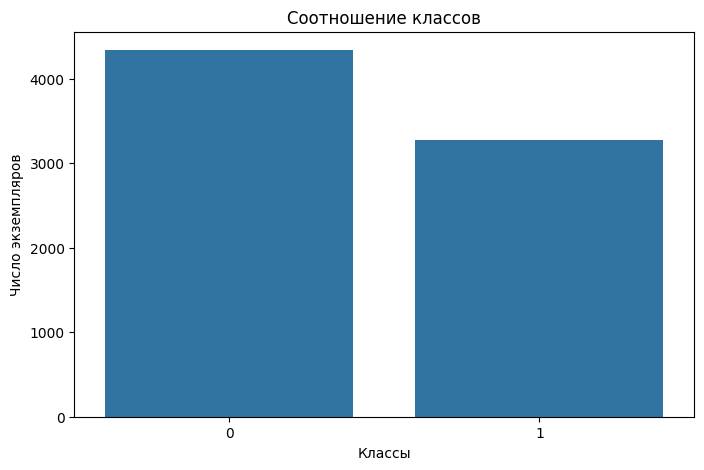

In [85]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Соотношение классов')
plt.xlabel('Классы')
plt.ylabel('Число экземпляров')
plt.show()

- Объедините все три текстовых столбца в один (вам поможет конкатенация строк)

In [86]:
text_columns = ['keyword', 'location', 'text']

data['combined_text'] = data[text_columns].astype(str).agg(' '.join, axis=1)

print(data[['combined_text']].head())

                                       combined_text
0    Our Deeds are the Reason of this #earthquake...
1             Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' ar...
3    13,000 people receive #wildfires evacuation ...
4    Just got sent this photo from Ruby #Alaska a...


- Наконец, поделите данные на тренировочную и тестовую выборки.

In [87]:
X = data['combined_text']
y = data['target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Задание 11. Базовые модели. (1 балл).**

Данные, собираемые с сайтов, часто содержат мусор не информативный для моделей. Посмотрите, какого качества данные здесь. Для этого:
- Примените CountVectorizer из sklearn к сырым даным. Какого размера получилась матрица?

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("Размер матрицы признаков:", X.shape)

Размер матрицы признаков: (7613, 23489)


- Обучите логистическую регрессию на полученном наборе. Какое качество `f1` у модели получилось на тестовых данных?

In [96]:
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score на тестовых данных:", f1)

F1 Score на тестовых данных: 0.8076494717785048


- Обучите SVC на тех же данных с гиперпараметрами по умолчанию. Измерьте качество (`f1`) на тестовых данных и опишите результат. Проанализируйте качество и скорость обучения.

In [101]:
from sklearn.svm import SVC

model_svc = SVC()
start_time = time.time() 
model_svc.fit(X_train_vectorized, y_train)
end_time = time.time() 

y_pred_svc = model_svc.predict(X_test_vectorized)

f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

In [100]:
print("F1 Score на тестовых данных (SVC):", f1_svc)
print("Время обучения модели SVC:", end_time - start_time, "секунд")

F1 Score на тестовых данных (SVC): 0.8029392452975939
Время обучения модели SVC: 3.280402183532715 секунд


### **Задание 12. Улучшение базовых моделей за счет данных. (0.5 балла).**

- Подберите гиперпараметры CountVectorizer так, чтобы признаков было минимум в 4 раза меньше, чем объектов, а качество модели при этом изменилось не более чем на $\pm 0.07$. Опишите подобранные гиперпараметры и на что они влияют (0.5 балла).

Обучайте и логистическую регрессию, и SVC.

In [102]:
max_features = len(X_train) // 4
vectorizer = CountVectorizer(max_features=max_features, min_df=0.02, max_df=0.8)

In [103]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [104]:
model_lr = LogisticRegression()
start_time_lr = time.time()
model_lr.fit(X_train_vectorized, y_train)
end_time_lr = time.time()

y_pred_lr = model_lr.predict(X_test_vectorized)

f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

In [105]:
model_svc = SVC()
start_time_svc = time.time()
model_svc.fit(X_train_vectorized, y_train)
end_time_svc = time.time()

y_pred_svc = model_svc.predict(X_test_vectorized)

f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

In [106]:
print("F1 Score на тестовых данных (Logistic Regression):", f1_lr)
print("Время обучения модели Logistic Regression:", end_time_lr - start_time_lr, "секунд")

print("F1 Score на тестовых данных (SVC):", f1_svc)
print("Время обучения модели SVC:", end_time_svc - start_time_svc, "секунд")

F1 Score на тестовых данных (Logistic Regression): 0.66970598415077
Время обучения модели Logistic Regression: 0.011003255844116211 секунд
F1 Score на тестовых данных (SVC): 0.6996436785888224
Время обучения модели SVC: 1.135416030883789 секунд


min_df - игнор редких слов

max_df - слишком частые слова

Обучению так себе помогло

### **Задание 13. Улучшение базовых моделей путем подбора гиперпараметров. (1 балл).**
- Попробуйте подбирать разные гиперпараметры для логистической регрессии. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [108]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'], # Для L1
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train_vectorized, y_train)

best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print("Лучшие гиперпараметры:", best_params)
print("Лучший F1 Score на тренинговых данных:", best_f1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solv

- Попробуйте подбирать разные гиперпараметры для модели SVC. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [111]:
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01],  
    'degree': [2, 3]  # Использовать если kernel = 'poly'
}

svc_model = SVC()

grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=2, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search_svc.fit(X_train_vectorized, y_train)

best_params_svc = grid_search_svc.best_params_
best_f1_svc = grid_search_svc.best_score_

print("Лучшие гиперпараметры SVC:", best_params_svc)
print("Лучший F1 Score на тренинговых данных (SVC):", best_f1_svc)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=   0.8s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.8s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=   0.9s
[CV] END .......C=0.001, degree=2, gamma=auto, kernel=linear; total time=   0.8s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=   0.8s
[CV] END .......C=0.001, degree=2, gamma=auto, kernel=linear; total time=   0.8s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.9s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time=   0.9s
[CV] END .........C=0.001, degree=2, gamma=auto, kernel=poly; total time=   0.5s
[CV] END .........C=0.001, degree=2, gamma=auto, kernel=poly; total time=   0.7s
[CV] END ......C=0.001, degree=2, gamma=0.001, kernel=linear; total time=   0.6s
[CV] END ..........C=0.001, degree=2, gamma=aut

Ваши выводы здесь.

### **Задание 14. (0.5 балла)**

Оформите два пайплайна:
- для модели регрессии
- для SVC модели

в пайплайн должны входить предобработка сырого датасета и обучение модели.

In [113]:
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline([
    ('vectorizer', CountVectorizer(max_features=1000, min_df=0.02, max_df=0.8)),
    ('classifier', LogisticRegression()) 
])

start_time_lr = time.time()
pipeline_lr.fit(X_train, y_train)
end_time_lr = time.time()

pipeline_svc = Pipeline([
    ('vectorizer', CountVectorizer(max_features=1000, min_df=0.02, max_df=0.8)), 
    ('classifier', SVC(kernel='rbf')) 
])

start_time_svc = time.time()
pipeline_svc.fit(X_train, y_train)
end_time_svc = time.time()

In [114]:
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_svc = pipeline_svc.predict(X_test)

f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
print("F1 Score на тестовых данных (Logistic Regression):", f1_lr)
print("Время обучения модели Logistic Regression:", end_time_lr - start_time_lr, "секунд")
print("F1 Score на тестовых данных (SVC):", f1_svc)
print("Время обучения модели SVC:", end_time_svc - start_time_svc, "секунд")

F1 Score на тестовых данных (Logistic Regression): 0.66970598415077
Время обучения модели Logistic Regression: 0.08359384536743164 секунд
F1 Score на тестовых данных (SVC): 0.6996436785888224
Время обучения модели SVC: 1.2760610580444336 секунд


### **Выводы**

Зафиксируйте выводы работы. Проанализируйте, что проделано и какие результаты вы получили. Заполняется в свободной форме.

Попробовал уменьшить количество признаков, для борьбы с переобучением. Не совсем получилось. Возможно где-то по дороге возникла ошибка

## Чей кот?

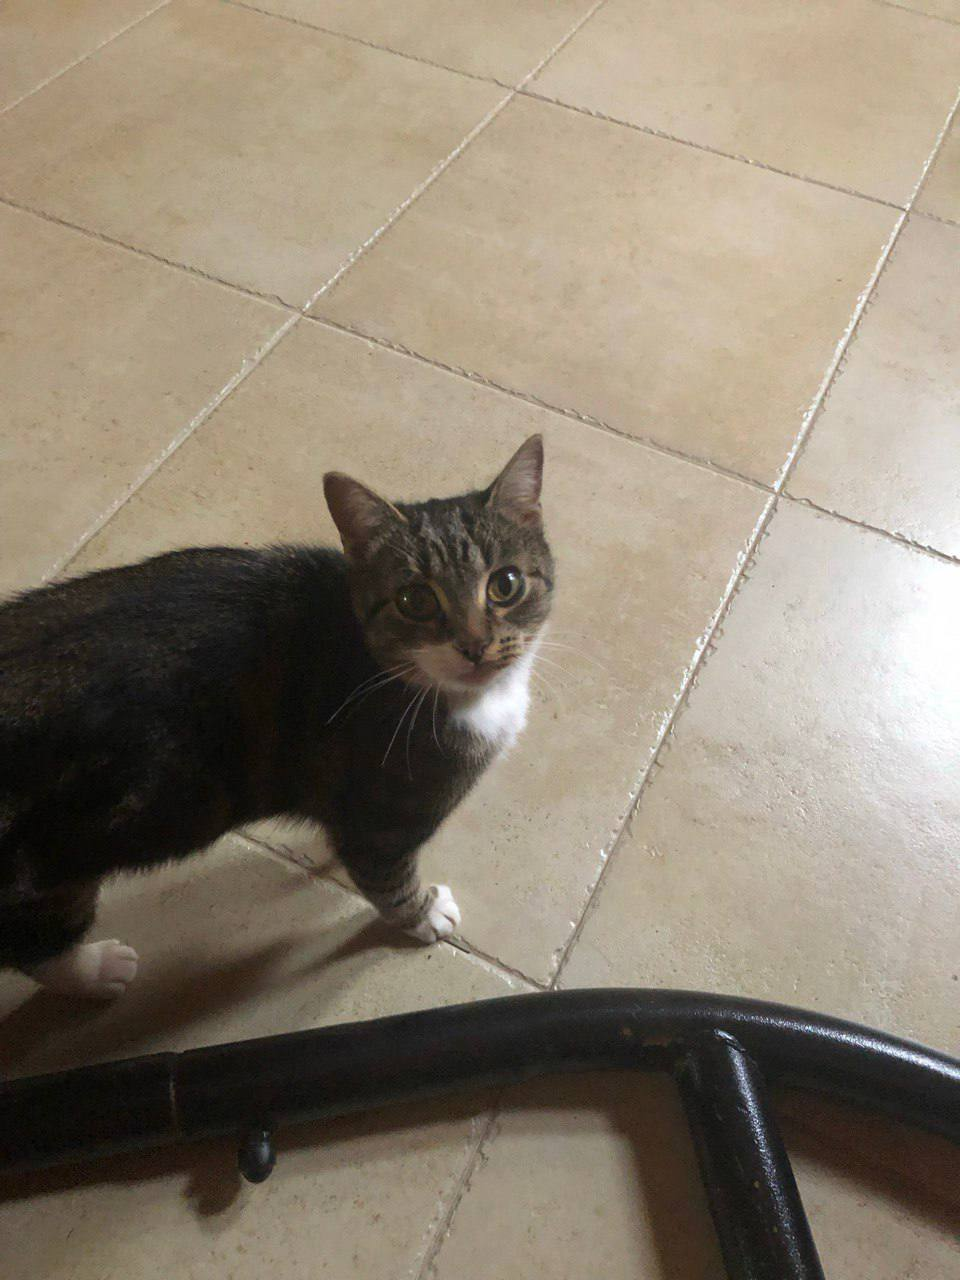

Сабрины